In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import spectral_analysis as sa
import scipy.interpolate as inter
from scipy.special import erf

## Load comparison templates

In [3]:
phase_h, wavelength_hsiao, flux_hsiao = np.loadtxt('../data/info_files/hsiao_template.dat', unpack = True)

In [4]:
epoch_n, wavelength_nugent, flux_nugent = np.loadtxt('../data/info_files/nugent_templates.dat', unpack = True)
epoch_n_91t, wavelength_nugent_91t, flux_nugent_91t = np.loadtxt('../data/info_files/nugent_91t_templates.dat', unpack = True)
epoch_n_91bg, wavelength_nugent_91bg, flux_nugent_91bg = np.loadtxt('../data/info_files/nugent_91bg_templates.dat', unpack = True)

In [5]:
phase_s, wavelength_salt, flux_salt = np.loadtxt('../data/info_files/SALT/salt2-4/salt2_template_0.dat', unpack = True)

In [6]:
t_h, U_h, B_h, V_h, R_h, I_h, Y_h, J_h, H_h, K_h = np.loadtxt('../data/info_files/hsiao_lc_template.dat', unpack = True)

In [7]:
t_n, U_n, B_n, V_n, R_n, I_n, J_n, H_n, K_n = np.loadtxt('../data/info_files/nugent_light_curves.dat', unpack = True)

In [8]:
hsiao_temps = {}
phase_list = []
first = True
for i, phase in enumerate(phase_h):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            hsiao_temps[float(phase_h[i-1])] = [temp_wave, temp_flux]
        temp_wave = [wavelength_hsiao[i]]
        temp_flux = [flux_hsiao[i]]
    else:
        temp_wave.append(wavelength_hsiao[i])
        temp_flux.append(flux_hsiao[i])
    first = False

In [9]:
nug_temps = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps[float(epoch_n[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent[i]]
        temp_flux = [flux_nugent[i]]
    else:
        temp_wave.append(wavelength_nugent[i])
        temp_flux.append(flux_nugent[i])
    first = False

nug_temps_91t = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n_91t):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps_91t[float(epoch_n_91t[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent_91t[i]]
        temp_flux = [flux_nugent_91t[i]]
    else:
        temp_wave.append(wavelength_nugent_91t[i])
        temp_flux.append(flux_nugent_91t[i])
    first = False
    
nug_temps_91bg = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n_91bg):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps_91bg[float(epoch_n_91bg[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent_91bg[i]]
        temp_flux = [flux_nugent_91bg[i]]
    else:
        temp_wave.append(wavelength_nugent_91bg[i])
        temp_flux.append(flux_nugent_91bg[i])
    first = False

In [10]:
salt_temps = {}
phase_list = []
first = True
for i, phase in enumerate(phase_s):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            salt_temps[float(phase_s[i-1])] = [temp_wave, temp_flux]
        temp_wave = [wavelength_salt[i]]
        temp_flux = [flux_salt[i]]
    else:
        temp_wave.append(wavelength_salt[i])
        temp_flux.append(flux_salt[i])
    first = False

## Interpolate templates

In [11]:
wave_h = hsiao_temps[0.][0]
flux_h = hsiao_temps[0.][1]

In [12]:
wave_interp_h = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h = inter.splrep(wave_h, flux_h)
flux_interp_h = inter.splev(wave_interp_h, flux_spl_h, ext = 3)
h_template = composite.supernova(wave_interp_h, flux_interp_h)
h_template.phase_array = np.zeros(len(flux_interp_h))

In [13]:
wave_n = nug_temps[0.][0]
flux_n = nug_temps[0.][1]

wave_n_91t = nug_temps_91t[0.][0]
flux_n_91t = nug_temps_91t[0.][1]

wave_n_91bg = nug_temps_91bg[0.][0]
flux_n_91bg = nug_temps_91bg[0.][1]

In [14]:
wave_interp_n = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n = inter.splrep(wave_n, flux_n)
flux_interp_n = inter.splev(wave_interp_n, flux_spl_n, ext = 3)
n_template = composite.supernova(wave_interp_n,flux_interp_n)
n_template.phase_array = np.zeros(len(flux_interp_n))

wave_interp_n_91t = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_91t = inter.splrep(wave_n_91t, flux_n_91t)
flux_interp_n_91t = inter.splev(wave_interp_n_91t, flux_spl_n_91t, ext = 3)
n_template_91t = composite.supernova(wave_interp_n_91t,flux_interp_n_91t)
n_template_91t.phase_array = np.zeros(len(flux_interp_n_91t))

wave_interp_n_91bg = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_91bg = inter.splrep(wave_n_91bg, flux_n_91bg)
flux_interp_n_91bg = inter.splev(wave_interp_n_91bg, flux_spl_n_91bg, ext = 3)
n_template_91bg = composite.supernova(wave_interp_n_91bg,flux_interp_n_91bg)
n_template_91bg.phase_array = np.zeros(len(flux_interp_n_91bg))

In [15]:
wave_s = salt_temps[0.][0]
flux_s = salt_temps[0.][1]

In [16]:
wave_interp_s = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s = inter.splrep(wave_s, flux_s)
flux_interp_s = inter.splev(wave_interp_s, flux_spl_s, ext = 3)
s_template = composite.supernova(wave_interp_s, flux_interp_s)
s_template.phase_array = np.zeros(len(flux_interp_s))

## Maximum light - normal Ia composite spectrum

In [17]:
# query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1 and phase <= 1",
#          "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= 1.02 and dm15_source < 1.24) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.24))"]
query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1 and phase <= 1 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))",
         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))"]

In [18]:
composites, sn_arrays, boot_sn_arrays = query_db.main(len(query), query, boot=True, medmean=1, gini_balance = True, verbose=False, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1 and phase <= 1 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
../data/kaepora_v1.db
170 Total Spectra found
5 flagged spectra removed 165 spectra left
3 spectra of peculiar Ias removed 162 spectra left
148 spectra of SNe with that have host reddening corrections
Arrays cleaned
4 spectra may have telluric contamination


composite.py:1223: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:
composite.py:1260: RuntimeWarning: divide by zero encountered in divide
  error = 1./np.sqrt(template.ivar)


99 total SNe
removed spectra of SNe with A_V > 2.0

Using 142 spectra of 96 SNe


gini.py:43: RuntimeWarning: invalid value encountered in absolute
  g_diff = np.absolute(g_wi - g_wj)


Gini balancing...
Balanced after 29 iterations
Bootstrapping
scaling boots...


C:\Program Files\Anaconda2\lib\site-packages\scipy\optimize\optimize.py:527: RuntimeWarning: invalid value encountered in absolute
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and


computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
../data/kaepora_v1.db
66 Total Spectra found
3 flagged spectra removed 63 spectra left
0 spectra of peculiar Ias removed 63 spectra left
54 spectra of SNe with that have host reddening corrections
Arrays cleaned
2 spectra may have telluric contamination
36 total SNe
removed spectra of SNe with A_V > 2.0

Using 51 spectra of 34 SNe


gini.py:48: RuntimeWarning: invalid value encountered in double_scalars
  gini_coeffs.append(gini_num/gini_denom)


Gini balancing...
Balanced after 12 iterations
Bootstrapping
scaling boots...
computing confidence intervals...


In [19]:
query_db.save_comps_to_files(composites, 'siebert_template_comparison_max_light')

0.11 1.11 0.013
../data/S19_Composite_Spectra/siebert_template_comparison_max_light_N=96_Nspec=142_phase=p0.11_dm15=1.11_z=0.013.txt
0.09 1.09 0.013
../data/S19_Composite_Spectra/siebert_template_comparison_max_light_N=34_Nspec=51_phase=p0.09_dm15=1.09_z=0.013.txt


In [20]:
query_db.set_min_num_spec(composites, 5)

In [21]:
comps_and_temps = []
for comp in composites:
    comps_and_temps.append(comp)
comps_and_temps.append(h_template)
comps_and_temps.append(n_template)
comps_and_temps.append(s_template)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[2], True)

## Generate photometry from template spectra and compare to template light curves

In [22]:
import pyphot

In [23]:
from pyphot.vega import Vega
vega = Vega()
lib = pyphot.get_library()
f = lib['GROUND_JOHNSON_B']
# compute the integrated flux through the filter f
# note that it work on many spectra at once
fluxes = f.get_flux(vega.wavelength, vega.flux, axis=-1)
# convert to vega magnitudes
mags = -2.5 * np.log10(fluxes) - f.Vega_zero_mag
print("Vega magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))
mags = -2.5 * np.log10(fluxes) - f.AB_zero_mag
print("AB magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))
mags = -2.5 * np.log10(fluxes) - f.ST_zero_mag
print("ST magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))

Vega magnitude of Vega in GROUND_JOHNSON_B is : 0.000000 mag
AB magnitude of Vega in GROUND_JOHNSON_B is : -0.074212 mag
ST magnitude of Vega in GROUND_JOHNSON_B is : -0.587021 mag


In [24]:
lib = pyphot.get_library()
B = lib['GROUND_JOHNSON_B']
V = lib['GROUND_JOHNSON_V']
hsiao_fluxB = B.get_flux(comps_and_temps[2].wavelength, comps_and_temps[2].flux, axis = -1)
hsiao_fluxV = V.get_flux(comps_and_temps[2].wavelength, comps_and_temps[2].flux, axis = -1)
hsiao_magB = -2.5 * np.log10(hsiao_fluxB) - B.Vega_zero_mag
hsiao_magV = -2.5 * np.log10(hsiao_fluxV) - V.Vega_zero_mag
print hsiao_magB, hsiao_magV
hsiao_magB = -2.5 * np.log10(hsiao_fluxB) - B.AB_zero_mag
hsiao_magV = -2.5 * np.log10(hsiao_fluxV) - V.AB_zero_mag
print hsiao_magB, hsiao_magV

-0.0387656219521 0.0423946332271
-0.112977534603 0.0345530104216


In [25]:
hsiao_B = []
hsiao_V = []
i=-20.
phases_h = []
while i <= np.amax(hsiao_temps.keys()):
    Bflux = B.get_flux(np.asarray(hsiao_temps[i][0]), np.asarray(hsiao_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(hsiao_temps[i][0]), np.asarray(hsiao_temps[i][1]), axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    hsiao_B.append(Bmag)
    hsiao_V.append(Vmag)
    phases_h.append(i)
    i+=1

In [26]:
nug_B = []
nug_V = []
i=-20.
phases_n = []
while i <= np.amax(nug_temps.keys()):
    Bflux = B.get_flux(np.asarray(nug_temps[i][0]), np.asarray(nug_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(nug_temps[i][0]), np.asarray(nug_temps[i][1]), axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    nug_B.append(Bmag)
    nug_V.append(Vmag)
    phases_n.append(i)
    i+=1

In [27]:
salt_B = []
salt_V = []
i=-20.
phases_s = []
while i <= np.amax(salt_temps.keys()):
    Bflux = B.get_flux(np.asarray(salt_temps[i][0]), np.asarray(salt_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(salt_temps[i][0]), np.asarray(salt_temps[i][1]), axis = -1)
#     Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    salt_B.append(Bmag)
    salt_V.append(Vmag)
    phases_s.append(i)
    i+=1

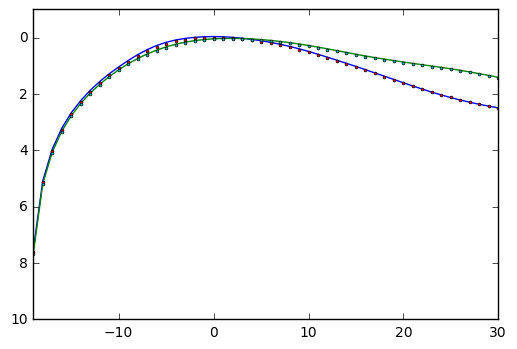

In [28]:
plt.plot(phases_h, hsiao_B)
plt.plot(phases_h, hsiao_V)
plt.plot(t_h, B_h, 'o', markersize=2)
plt.plot(t_h, V_h, 'o', markersize=2)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.ylim([10,-1])
plt.show()

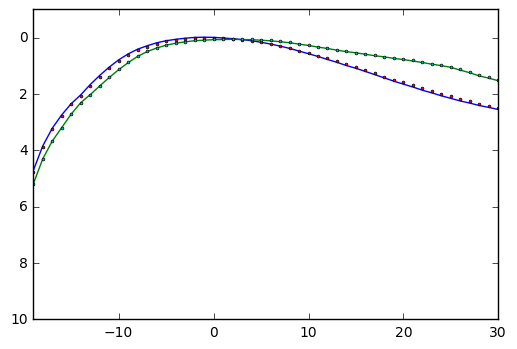

In [29]:
plt.plot(phases_n, nug_B)
plt.plot(phases_n, nug_V)
plt.plot(t_n, B_n, 'o', markersize=2)
plt.plot(t_n, V_n, 'o', markersize=2)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.ylim([10,-1])
plt.show()

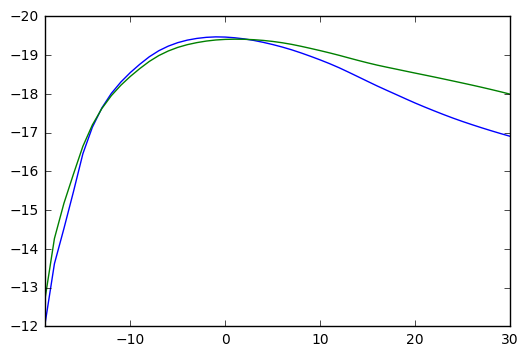

In [30]:
salt_B[0] = np.nan
salt_V[0] = np.nan
plt.plot(phases_s, salt_B)
plt.plot(phases_s, salt_V)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.show()

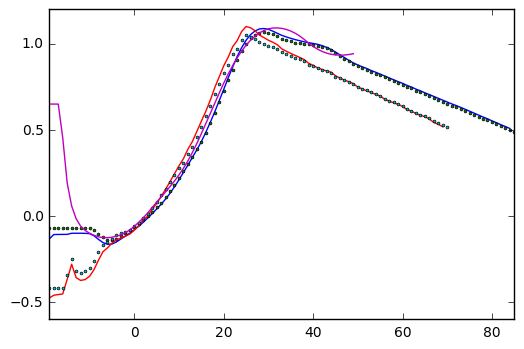

In [31]:
plt.plot(phases_h, np.asarray(hsiao_B)-np.asarray(hsiao_V))
plt.plot(t_h, np.asarray(B_h) - np.asarray(V_h), 'o', markersize=2)
plt.plot(phases_n, np.asarray(nug_B)-np.asarray(nug_V))
plt.plot(t_n, np.asarray(B_n) - np.asarray(V_n), 'o', markersize=2)
plt.plot(phases_s, np.asarray(salt_B)-np.asarray(salt_V))
plt.xlim([-19,85])
plt.show()

## Composite spectral time series for normal - Ias and non dm15 controlled

In [32]:
#changeable phase bin size
query_strings_all = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))"]
max_phase = 60.
p1 = -10.
k = 2.
p2 = p1+k
while p1 < max_phase:
    if p1 > 30.:
        k=7
        p2=p1+4
    query_strings_all.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))"% (p1,p2))
    p1 += k
    p2 += k
print query_strings_all

['SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8.000000 and phase < -6.000000 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -6.000000 and phase < -4.000000 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -2.000000 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_f

In [33]:
query_strings_dm15 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))"]
max_phase = 60.
p1 = -10.
k = 2.
p2 = p1+k
while p1 < max_phase:
    if p1 > 30.:
        k=7
        p2=p1+4
    query_strings_dm15.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))"% (p1,p2))
    p1 += k
    p2 += k
for q in query_strings_dm15:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8.000000 and phase < -6.000000 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -6.000000 and phase < -4.000000 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -2.000000 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >

In [34]:
composites_all, sn_arrays_all, boot_sn_arrays_all = query_db.main(len(query_strings_all), query_strings_all, boot=True, medmean=1, gini_balance = True, verbose=False, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
../data/kaepora_v1.db
94 Total Spectra found
1 flagged spectra removed 93 spectra left
0 spectra of peculiar Ias removed 93 spectra left
85 spectra of SNe with that have host reddening corrections
Arrays cleaned
8 spectra may have telluric contamination
36 total SNe
removed spectra of SNe with A_V > 2.0

Using 83 spectra of 35 SNe
Gini balancing...
Balanced after 21 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
../data/kaepora_v1.db
121 Total Spectra found
2 flagged spectra removed 119 spectra left
3 spectra of peculiar Ias removed 116 spectra left


In [35]:
composites_dm15, sn_arrays_dm15, boot_sn_arrays_dm15 = query_db.main(len(query_strings_dm15), query_strings_dm15, boot=True, medmean=1, gini_balance = True, verbose=False,combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
../data/kaepora_v1.db
53 Total Spectra found
1 flagged spectra removed 52 spectra left
0 spectra of peculiar Ias removed 52 spectra left
50 spectra of SNe with that have host reddening corrections
Arrays cleaned
5 spectra may have telluric contamination
16 total SNe
removed spectra of SNe with A_V > 2.0

Using 48 spectra of 15 SNe
Gini balancing...
Balanced after 13 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
../data/kaepora_v1.db
52 Total Spectra found
1 flagged spectra removed 51 spectra left
0 spectra of peculiar Ias removed 51 spectra left

## Average phases of each composite in time series

In [36]:
comp_phases = []
comp_B = []
comp_V = []
query_db.set_min_num_spec(composites_all, 5)
for comp in composites_all:
    Bflux = B.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Vflux = V.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    comp_B.append(Bmag)
    comp_V.append(Vmag)
    comp_phases.append(np.average(comp.phase_array[comp.x1:comp.x2]))
print comp_phases
print comp_B
print comp_V

[-11.211921574828184, -8.8553489395217877, -6.9148944179951695, -5.0527696804117728, -2.9185665678869941, -0.96002971314877861, 0.95257375873793704, 2.9132170175809491, 4.8841820774213955, 7.0467289176955044, 8.9050377987077614, 10.960836629384772, 12.92701874617614, 14.914647763292562, 17.102520650589081, 18.909319973285772, 20.931469659089313, 23.141022671047274, 25.035453841131876, 27.226564975907447, 28.898332304707612, 31.028724121047052, 33.848851696122871, 41.147971779765101, 47.957419772405899, 55.226837651736119]
[-20.056459211036355, -20.046921156542968, -20.031890731198452, -20.03305276230957, -20.050463066991963, -20.062651580644676, -20.056570781093452, -20.133201820822446, -20.090864050744788, -20.080133836547596, -20.054596374570057, -20.047605670515697, -19.974373098428885, -19.843057539056854, -19.799462765820838, -19.774186158064737, -19.767867503981662, -19.70195327093186, -19.690589800605242, -19.631927494643769, -19.496659206236302, -19.550742683019372, -19.6114544

In [37]:
comp_phases_dm15 = []
comp_B_dm15 = []
comp_V_dm15 = []
query_db.set_min_num_spec(composites_dm15, 5)
for comp in composites_dm15:
    Bflux = B.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Vflux = V.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    comp_B_dm15.append(Bmag)
    comp_V_dm15.append(Vmag)
    comp_phases_dm15.append(np.average(comp.phase_array[comp.x1:comp.x2]))
print comp_phases_dm15
print comp_B_dm15
print comp_V_dm15

[-11.30723314594124, -8.6912981396855944, -6.8945789803400475, -5.0181435451233565, -2.961132227872763, -0.94018005086203227, 0.88097457602354323, 2.9303366067878152, 4.9561200068910525, 6.9483901963760202, 8.8844115617487223, 11.011202695697355, 12.959452668366669, 15.147002347582298, 17.071121533039623, 18.90006502307682, 20.938266259972718, 23.175042705906368, 25.009307267952007, 27.12260539161694, 28.871356111841141, 30.991444730437923, 33.870273757430923, 41.145333658103056, 47.918196740093585, 55.361687080769059]
[-20.009071378348857, -20.01511941942799, -20.01214706894601, -20.011866652479679, -20.001789859804884, -20.021955402513079, -20.011303566298871, -20.126145268227212, -20.076642753813879, -20.076939300386837, -20.047450433338891, -20.01467555599006, -19.961075695148011, -19.844045320193977, -19.802961688340485, -19.732625038217453, -19.71482640109128, -19.739000804083723, -19.734115436766178, -19.614087202796902, -19.469447797235613, -19.516049136679854, -19.604887795257

## Measure error on composite colors from bootstrapped templates

In [38]:
#bootstrap colors
boot_BmVs = []
for boots in boot_sn_arrays_all:
    boot_B = []
    boot_V = []
    for b in boots:
        Bflux = B.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Vflux = V.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
        Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    #     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    #     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
        boot_B.append(Bmag)
        boot_V.append(Vmag)
    BmV = np.asarray(boot_B) - np.asarray(boot_V)
    boot_BmVs.append(BmV)

In [39]:
low_errors = []
up_errors = []
boot_resids = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
for k in range(len(boot_sn_arrays_all)):
    resids = []
    comp_BmVs = np.asarray(comp_B[k]) - np.asarray(comp_V[k])
    resids.append(boot_BmVs[k] - comp_BmVs)
    resid_sort = np.sort(resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
errors = [low_errors, up_errors]

In [40]:
#bootstrap colors dm15
boot_BmVs_dm15 = []
for boots in boot_sn_arrays_dm15:
    boot_B = []
    boot_V = []
    for b in boots:
        Bflux = B.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Vflux = V.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
        Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    #     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    #     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
        boot_B.append(Bmag)
        boot_V.append(Vmag)
    BmV = np.asarray(boot_B) - np.asarray(boot_V)
    boot_BmVs_dm15.append(BmV)

In [41]:
low_errors_dm15 = []
up_errors_dm15 = []
boot_resids_dm15 = []
for k in range(len(boot_sn_arrays_dm15)):
    resids = []
    comp_BmVs_dm15 = np.asarray(comp_B_dm15[k]) - np.asarray(comp_V_dm15[k])
    resids.append(boot_BmVs_dm15[k] - comp_BmVs_dm15)
    resids = [[x for x in resids[0] if str(x) != 'nan']]
    if k == 6:
        print resids, len(resids[0])
    resid_sort = np.sort(resids)[0]
    boot_resids_dm15.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors_dm15.append(np.absolute(resid_sort[low_ind]))
    up_errors_dm15.append(resid_sort[up_ind])
errors_dm15 = [low_errors_dm15, up_errors_dm15]

[[-0.0091967744082701586, 0.024921345842045639, 0.018191999145553694, -0.0093653516446430274, -0.027595851793719817, -0.023929051648782007, 0.007584719423672226, 0.013413929691907356, 0.01502058112360416, -0.023865190105642142, -0.0041937246596752686, -0.010314322346417271, -0.0079048740395357697, -0.016694354367775333, -0.0066765615897779185, -0.022429900625940746, -0.016050428773905168, -0.0061010126512144325, -0.0034596283079828538, -0.015778067599395484, -0.0075529707521049261, -0.0064338173363260864, 0.015418703419278756, 0.017314735414963422, -0.0071079530857360851, -0.00021285572059071001, -0.0029975293639097345, 0.02242171349019273, 0.0025416861903835297, -0.01555640740280495, -0.017646969645877419, -0.017599669291417541, -0.012061741981309382, -0.0067706635330573306, 0.030907892414010263, -0.0060294430774661123, 0.021756966433947866, 0.0032596163516913634, -0.020599892258584163, 0.0052528049405395905, -0.010072147765637141, 0.0075716748878527085, 0.0034974665359754908, -0.0006

In [42]:
dm15s = []
for comp in composites_all:
    dm15s.append(np.nanmean(comp.dm15_array[comp.x1:comp.x2]))
print np.nanmean(dm15s)
print np.nanmin(dm15s), np.nanmax(dm15s)
dm15s = []
for comp in composites_dm15:
    dm15s.append(np.nanmean(comp.dm15_array[comp.x1:comp.x2]))
print np.nanmean(dm15s)
print np.amin(dm15s), np.amax(dm15s)

1.10937327492
1.02712932525 1.17349496585
1.08685093119
1.06627656014 1.10895623194


In [43]:
# import glob
# print glob.glob('../data/info_files/*.dat')
b_mlcs = np.genfromtxt('../data/info_files\\vectors_nouv-rv19-tweaked_B.dat', unpack=True)
v_mlcs = np.genfromtxt('../data/info_files\\vectors_nouv-rv19-tweaked_V.dat', unpack=True)

Last Run: 
Comp B-V: [-0.09145674 -0.15443254 -0.17353724 -0.16309863 -0.14759521 -0.10200049
 -0.08507014  0.03149485  0.03859211  0.12567596  0.20024751  0.27528377
  0.35765207  0.47786487  0.61492753  0.64358317  0.76397357  0.91091482
  0.93376694  0.95809297  1.03031616  0.99993263  0.96316385  0.96278683
  0.81777637  0.7814207 ]
Comp err:  [[0.037874118302081428, 0.020268799736800958, 0.019612160811483648, 0.013032333381779893, 0.01466053067156281, 0.012735780850530176, 0.015038739663573608, 0.028958318917450043, 0.023684906338552025, 0.024328853257912897, 0.023086912305966933, 0.02907280529000289, 0.017554601700609851, 0.034956503323083865, 0.049174504466346747, 0.033410070051200336, 0.032984246693690267, 0.035662600748732842, 0.021159370831743018, 0.046220374702489408, 0.022975188914728051, 0.031753189180918184, 0.038587940314840807, 0.023307377250418426, 0.03219155084277503, 0.042998490169225079], [0.030001788698470477, 0.032872307215569663, 0.01669988129426514, 0.0075028740

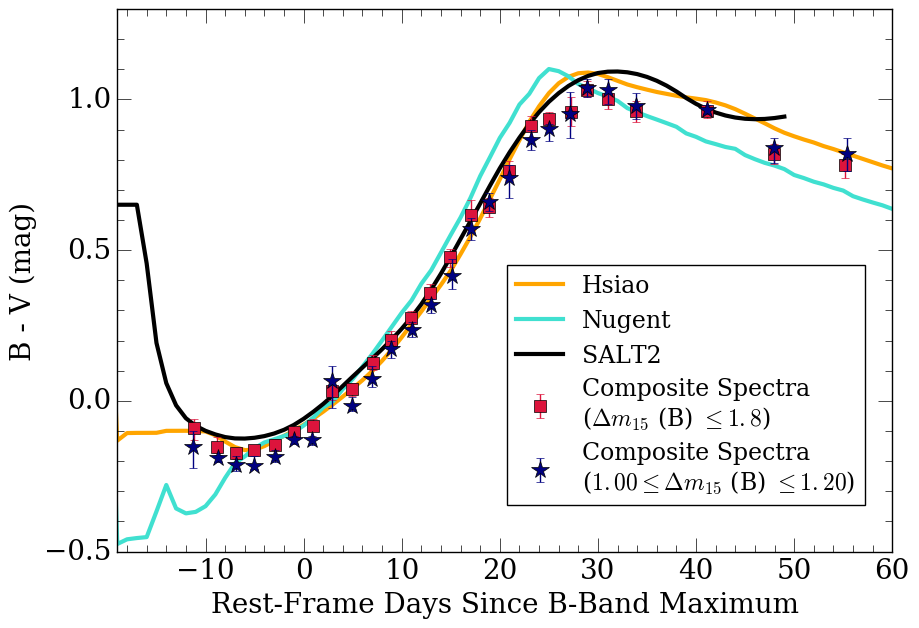

In [95]:
color_dict = {"Comp": "#000080", "Hsiao": "orange", "Nugent": "turquoise", "SALT-II": "black"}
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=5)
plt.xlabel('Rest-Frame Days Since B-Band Maximum', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.plot(phases_h, np.asarray(hsiao_B)-np.asarray(hsiao_V), color = color_dict['Hsiao'], label = 'Hsiao', linewidth=3, zorder=-1)
plt.plot(phases_n, np.asarray(nug_B)-np.asarray(nug_V), color = color_dict['Nugent'], label = 'Nugent', linewidth=3, zorder=-1)
plt.plot(phases_s, np.asarray(salt_B)-np.asarray(salt_V), color = color_dict['SALT-II'],label='SALT2', linewidth=3, zorder=-1)
# plt.plot(b_mlcs[0], b_mlcs[1] - v_mlcs[1], color = 'magenta', label = 'MLCS', linewidth=3, zorder=-1)
plt.errorbar(comp_phases, np.asarray(comp_B) - np.asarray(comp_V), yerr=errors, fmt='s', markersize=8, color = "crimson", label = 'Composite Spectra \n($\Delta m_{15}$ (B) $\leq 1.8$)', zorder=-.6)
plt.errorbar(comp_phases_dm15, np.asarray(comp_B_dm15) - np.asarray(comp_V_dm15), yerr=errors_dm15, fmt='*', markersize=13, color = color_dict['Comp'], label = 'Composite Spectra \n($1.00 \leq \Delta m_{15}$ (B) $\leq 1.20$)', zorder=-.5)
plt.xlim([-19,60])
plt.ylim([-.5,1.3])
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.05, 0.48, 0.5),numpoints=1, fontsize=17)
plt.savefig('../../../Paper_Drafts/template_comparisons_updated/color_curve.pdf', dpi = 300, bbox_inches = 'tight')
plt.savefig('../../../Paper_Drafts/plot_images/color_curve.png', dpi = 300, bbox_inches = 'tight')
plt.savefig('../../../FLASH/color_curve.png', dpi = 300, bbox_inches = 'tight')
print 'Last Run: '
print 'Comp B-V:', np.asarray(comp_B) - np.asarray(comp_V)
print 'Comp err: ', errors
print 'Comp B-V dm15: ', np.asarray(comp_B_dm15) - np.asarray(comp_V_dm15)
print 'Comp err: ', errors_dm15
plt.show()

In [45]:
query_db.save_comps_to_files(composites_all, 'siebert_color_curve')
query_db.save_comps_to_files(composites_dm15, 'siebert_color_curve_dm15')

-11.21 1.03 0.01
../data/S19_Composite_Spectra/siebert_color_curve_N=35_Nspec=83_phase=m11.21_dm15=1.03_z=0.01.txt
-8.86 1.04 0.012
../data/S19_Composite_Spectra/siebert_color_curve_N=53_Nspec=98_phase=m8.86_dm15=1.04_z=0.012.txt
-6.91 1.11 0.011
../data/S19_Composite_Spectra/siebert_color_curve_N=67_Nspec=110_phase=m6.91_dm15=1.11_z=0.011.txt
-5.05 1.11 0.014
../data/S19_Composite_Spectra/siebert_color_curve_N=75_Nspec=133_phase=m5.05_dm15=1.11_z=0.014.txt
-2.92 1.13 0.014
../data/S19_Composite_Spectra/siebert_color_curve_N=89_Nspec=131_phase=m2.92_dm15=1.13_z=0.014.txt
-0.96 1.16 0.012
../data/S19_Composite_Spectra/siebert_color_curve_N=91_Nspec=136_phase=m0.96_dm15=1.16_z=0.012.txt
0.95 1.1 0.014
../data/S19_Composite_Spectra/siebert_color_curve_N=93_Nspec=145_phase=p0.95_dm15=1.1_z=0.014.txt
2.91 1.16 0.014
../data/S19_Composite_Spectra/siebert_color_curve_N=85_Nspec=149_phase=p2.91_dm15=1.16_z=0.014.txt
4.88 1.13 0.014
../data/S19_Composite_Spectra/siebert_color_curve_N=98_Nspec=1

## Foley08 Templates

In [46]:
wavelength_f08_m7, flux_f08_m7, low_f08_m7, up_f08_m7 = np.loadtxt('../data/foley/foley=0.01=-6.6=-0.08=0.37=47.flm', unpack = True)
wavelength_f08_0, flux_f08_0, low_f08_0, up_f08_0 = np.loadtxt('../data/foley/foley=0.02=0.5=-0.02=0.46=45.flm', unpack = True)
wavelength_f08_p6, flux_f08_p6, low_f08_p6, up_f08_p6 = np.loadtxt('../data/foley/foley=0.01=6.2=0.08=0.28=45.flm', unpack = True)
wavelength_f08_p14, flux_f08_p14, low_f08_p14, up_f08_p14 = np.loadtxt('../data/foley/foley=0.01=13.8=0.06=0.42=43.flm', unpack = True)
wavelength_f08_p19, flux_f08_p19, low_f08_p19, up_f08_p19 = np.loadtxt('../data/foley/foley=0.01=19.4=-0.02=0.59=26.flm', unpack = True)

In [47]:
#-1week
wave_interp_f08_m7 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_m7 = inter.splrep(wavelength_f08_m7, flux_f08_m7)
low_spl_f08_m7 = inter.splrep(wavelength_f08_m7, low_f08_m7)
up_spl_f08_m7 = inter.splrep(wavelength_f08_m7, up_f08_m7)

flux_interp_f08_m7 = inter.splev(wave_interp_f08_m7, flux_spl_f08_m7, ext = 3)
low_interp_f08_m7 = inter.splev(wave_interp_f08_m7, low_spl_f08_m7, ext = 3)
up_interp_f08_m7 = inter.splev(wave_interp_f08_m7, up_spl_f08_m7, ext = 3)

f08_template_m7 = composite.supernova(wave_interp_f08_m7, flux_interp_f08_m7, low_conf=low_interp_f08_m7, up_conf=up_interp_f08_m7)
f08_template_m7.phase_array = np.zeros(len(flux_interp_f08_m7))

#max
wave_interp_f08_0 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_0 = inter.splrep(wavelength_f08_0, flux_f08_0)
low_spl_f08_0 = inter.splrep(wavelength_f08_0, low_f08_0)
up_spl_f08_0 = inter.splrep(wavelength_f08_0, up_f08_0)

flux_interp_f08_0 = inter.splev(wave_interp_f08_0, flux_spl_f08_0, ext = 3)
low_interp_f08_0 = inter.splev(wave_interp_f08_0, low_spl_f08_0, ext = 3)
up_interp_f08_0 = inter.splev(wave_interp_f08_0, up_spl_f08_0, ext = 3)

f08_template_0 = composite.supernova(wave_interp_f08_0, flux_interp_f08_0, low_conf=low_interp_f08_0, up_conf=up_interp_f08_0)
f08_template_0.phase_array = np.zeros(len(flux_interp_f08_0))

#+1week
wave_interp_f08_p6 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_p6 = inter.splrep(wavelength_f08_p6, flux_f08_p6)
low_spl_f08_p6 = inter.splrep(wavelength_f08_p6, low_f08_p6)
up_spl_f08_p6 = inter.splrep(wavelength_f08_p6, up_f08_p6)

flux_interp_f08_p6 = inter.splev(wave_interp_f08_p6, flux_spl_f08_p6, ext = 3)
low_interp_f08_p6 = inter.splev(wave_interp_f08_p6, low_spl_f08_p6, ext = 3)
up_interp_f08_p6 = inter.splev(wave_interp_f08_p6, up_spl_f08_p6, ext = 3)

f08_template_p6 = composite.supernova(wave_interp_f08_p6, flux_interp_f08_p6, low_conf=low_interp_f08_p6, up_conf=up_interp_f08_p6)
f08_template_p6.phase_array = np.zeros(len(flux_interp_f08_m7))

#+2week
wave_interp_f08_p14 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_p14 = inter.splrep(wavelength_f08_p14, flux_f08_p14)
low_spl_f08_p14 = inter.splrep(wavelength_f08_p14, low_f08_p14)
up_spl_f08_p14 = inter.splrep(wavelength_f08_p14, up_f08_p14)

flux_interp_f08_p14 = inter.splev(wave_interp_f08_p14, flux_spl_f08_p14, ext = 3)
low_interp_f08_p14 = inter.splev(wave_interp_f08_p14, low_spl_f08_p14, ext = 3)
up_interp_f08_p14 = inter.splev(wave_interp_f08_p14, up_spl_f08_p14, ext = 3)

f08_template_p14 = composite.supernova(wave_interp_f08_p14, flux_interp_f08_p14, low_conf=low_interp_f08_p14, up_conf=up_interp_f08_p14)
f08_template_p14.phase_array = np.zeros(len(flux_interp_f08_p14))

#+19days
wave_interp_f08_p19 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_p19 = inter.splrep(wavelength_f08_p19, flux_f08_p19)
low_spl_f08_p19 = inter.splrep(wavelength_f08_p19, low_f08_p19)
up_spl_f08_p19 = inter.splrep(wavelength_f08_p19, up_f08_p19)

flux_interp_f08_p19 = inter.splev(wave_interp_f08_p19, flux_spl_f08_p19, ext = 3)
low_interp_f08_p19 = inter.splev(wave_interp_f08_p19, low_spl_f08_p19, ext = 3)
up_interp_f08_p19 = inter.splev(wave_interp_f08_p19, up_spl_f08_p19, ext = 3)

f08_template_p19 = composite.supernova(wave_interp_f08_p19, flux_interp_f08_p19, low_conf=low_interp_f08_p19, up_conf=up_interp_f08_p19)
f08_template_p19.phase_array = np.zeros(len(flux_interp_f08_p19))

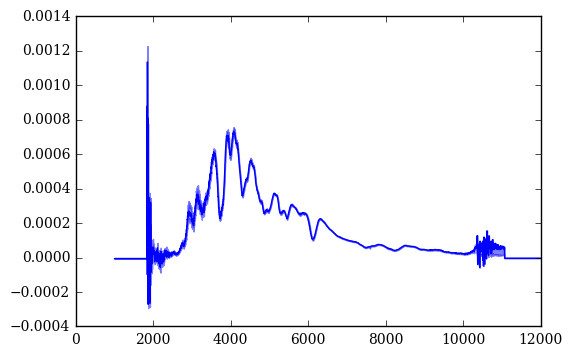

In [48]:
test_template = f08_template_0
plt.plot(test_template.wavelength[test_template.x1:test_template.x2],test_template.flux[test_template.x1:test_template.x2])
plt.fill_between(test_template.wavelength[test_template.x1:test_template.x2],test_template.low_conf[test_template.x1:test_template.x2], test_template.up_conf[test_template.x1:test_template.x2], color='b',alpha=.5)
# plt.ylim([-1,12])
plt.show()

## Spectral feature comparison at various epochs

In [96]:
query_db.set_min_num_spec(composites, 5)
comps_and_temps = []
for comp in composites:
    comps_and_temps.append(comp)
srange = np.where((s_template.wavelength > 2000.) & (s_template.wavelength < 9200))[0]
s_template.x1 = srange[0]
s_template.x2 = srange[-1]
comps_and_temps.append(h_template)
comps_and_temps.append(f08_template_0)
comps_and_temps.append(n_template)
comps_and_temps.append(s_template)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[2], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Foley"
comps_and_temps[4].name = "Nugent"
comps_and_temps[5].name = "SALT2"
for comp in comps_and_temps:
    v_strong, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900., 6300.)
    print comp.name, 'v = ', v_strong
#     r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp = .002, plot=False)
#     print comp.name, 'r = ', r
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2]],include_spec_bin=True, legend_labels = ["Composite Spectrum", "Hsiao",])

1.10640839444
1.09050031873
Comp v =  10899.6695413
Comp v =  10997.3983334
Hsiao v =  10997.3983334
Foley v =  11486.4857972
Nugent v =  12270.5626583
SALT2 v =  11290.7621201


In [50]:
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2]], include_spec_bin=True, legend_labels = ["Composite Spectrum \n($ 1.02 < \Delta m_{15} (B) < 1.24$)", "Hsiao",])

Phase:  0.105220523975
dm15:  1.10640839444
Redshift:  0.0131869184831


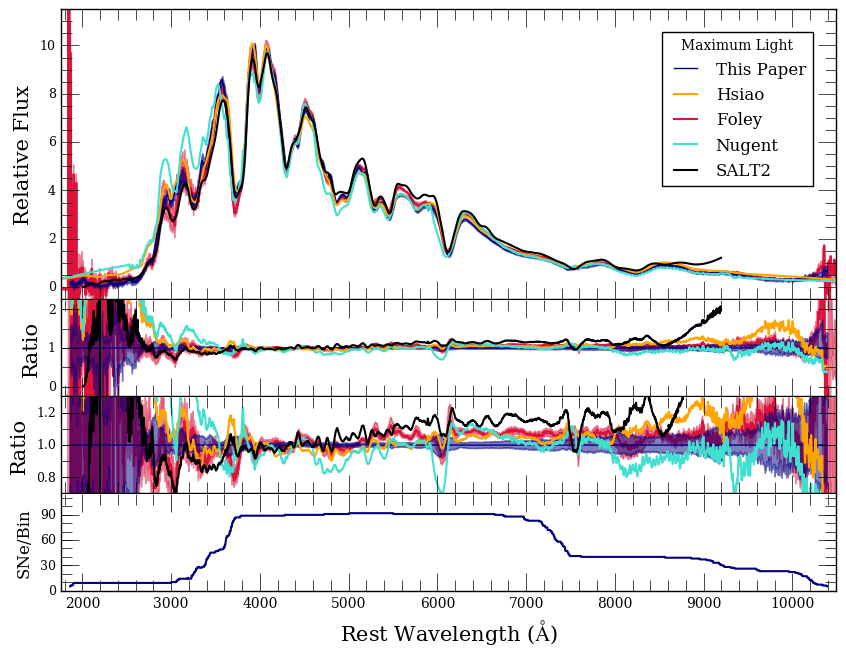

In [97]:
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], 
                     include_spec_bin=True, legend_labels = ["This Paper", "Hsiao", "Foley","Nugent","SALT2"], 
                     rm_last_label=False, text='Maximum Light', savename = 'template_comparisons_updated/temp_max_light_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], 
#                      include_spec_bin=True, legend_labels = ["This Paper", "Hsiao", "Foley","Nugent","SALT2"], text='Maximum Light',
#                      rm_last_label=True)

In [52]:
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], 
#                      include_spec_bin=True, rm_last_label=True, legend_labels = ["This Paper \n($ 1.02 < \Delta m_{15} (B) < 1.24$)", "Hsiao","Foley", "Nugent","SALT2"], 
#                      text='Maximum Light',savename = 'template_comparisons_updated/temp_max_light_dm15')

Phase:  0.105220523975
dm15:  1.10640839444
Redshift:  0.0131869184831
Phase:  0.0933154737353
dm15:  1.09050031873
Redshift:  0.0130190784949


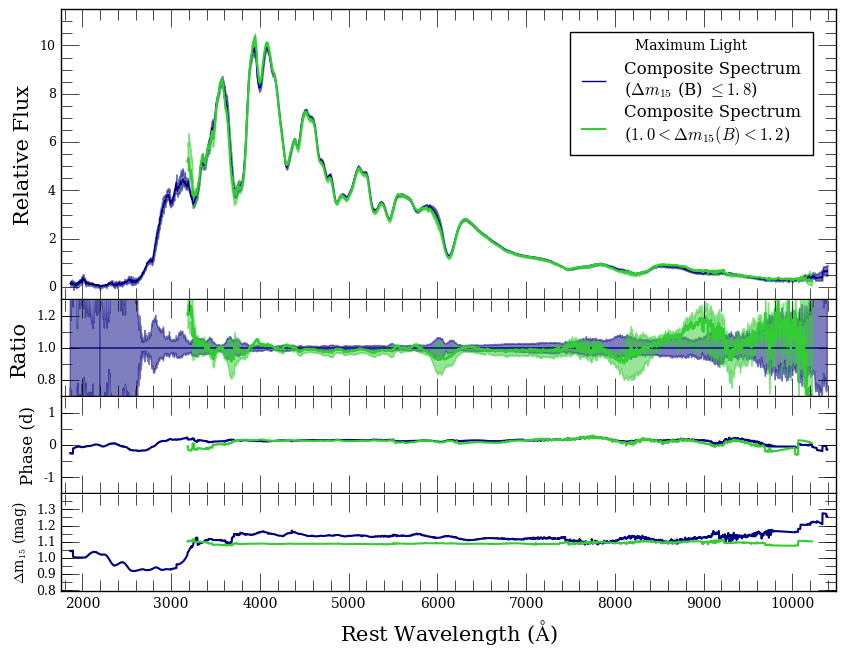

In [98]:
comps_and_temps[1].name = "Comp2"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], include_spec_bin=True, rm_last_label=True, include_phase_dm15=True, zoom=False,
                     legend_labels = ["Composite Spectrum \n($\Delta m_{15}$ (B) $\leq 1.8$)","Composite Spectrum \n($ 1.0 < \Delta m_{15} (B) < 1.2$)"],
                     text ='Maximum Light', savename = 'template_comparisons_updated/max_light_total_bin_comp')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], include_spec_bin=True, rm_last_label=True, include_phase_dm15=True, zoom=False,
#                      legend_labels = ["Composite Spectrum \n($\Delta m_{15}$ (B) $\leq 1.8$)","Composite Spectrum \n($ 1.0 < \Delta m_{15} (B) < 1.2$)"],
#                      text ='Maximum Light')

In [54]:
wave_h_1week = []
flux_h_1week = []
for i, phase in enumerate(phase_h):
    if float(phase) == 7.0:
        wave_h_1week.append(wavelength_hsiao[i])
        flux_h_1week.append(flux_hsiao[i])

In [55]:
wave_interp_h_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_1week = inter.splrep(wave_h_1week, flux_h_1week)
flux_interp_h_1week = inter.splev(wave_interp_h_1week, flux_spl_h_1week, ext = 3)
h_template_1week = composite.supernova(wave_interp_h_1week, flux_interp_h_1week)
h_template_1week.phase_array = np.zeros(len(flux_interp_h_1week))

In [56]:
wave_n_1week = []
flux_n_1week = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 27.0:
        wave_n_1week.append(wavelength_nugent[i])
        flux_n_1week.append(flux_nugent[i])

In [57]:
wave_interp_n_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_1week = inter.splrep(wave_n_1week, flux_n_1week)
flux_interp_n_1week = inter.splev(wave_interp_n_1week, flux_spl_n_1week, ext = 3)
n_template_1week = composite.supernova(wave_interp_n_1week,flux_interp_n_1week)
n_template_1week.phase_array = np.zeros(len(flux_interp_n_1week))

In [58]:
wave_s_1week = []
flux_s_1week = []
for i, phase in enumerate(phase_s):
    if float(phase) == 7.0:
        wave_s_1week.append(wavelength_salt[i])
        flux_s_1week.append(flux_salt[i])

In [59]:
wave_interp_s_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_1week = inter.splrep(wave_s_1week, flux_s_1week)
flux_interp_s_1week = inter.splev(wave_interp_s_1week, flux_spl_s_1week, ext = 3)
s_template_1week = composite.supernova(wave_interp_s_1week,flux_interp_s_1week)
s_template_1week.phase_array = np.zeros(len(flux_interp_s_1week))

In [60]:
query_1week = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 6 and phase < 8 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))",
         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 8 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))"]

In [61]:
composites_1week, sn_arrays_1week, boot_sn_arrays_1week = query_db.main(len(query_1week), query_1week, boot=True, medmean=1, gini_balance=True, verbose=False, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 6 and phase < 8 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
../data/kaepora_v1.db
164 Total Spectra found
8 flagged spectra removed 156 spectra left
2 spectra of peculiar Ias removed 154 spectra left
140 spectra of SNe with that have host reddening corrections
Arrays cleaned
5 spectra may have telluric contamination
93 total SNe
removed spectra of SNe with A_V > 2.0

Using 128 spectra of 89 SNe
Gini balancing...
Balanced after 28 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 8 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
../data/kaepora_v1.db
56 Total Spectra found
2 flagged spectra removed 54 spectra left
0 spectra of peculiar Ias removed 54 spectra lef

In [62]:
query_db.save_comps_to_files(composites_1week, 'siebert_template_comparison_p1week')

7.05 1.14 0.014
../data/S19_Composite_Spectra/siebert_template_comparison_p1week_N=89_Nspec=128_phase=p7.05_dm15=1.14_z=0.014.txt
6.95 1.09 0.012
../data/S19_Composite_Spectra/siebert_template_comparison_p1week_N=33_Nspec=41_phase=p6.95_dm15=1.09_z=0.012.txt


1.13083316511
1.09168782359
Comp v =  10899.6695413 6128.0
Comp v =  10704.3006753 6132.0
Hsiao v =  10899.6695413 6128
Foley v =  10997.3983334 6126
Nugent v =  10606.6606057 6134
SALT2 v =  10801.9703211 6130
Phase:  7.0467289177
dm15:  1.13607264601
Redshift:  0.0140893542158


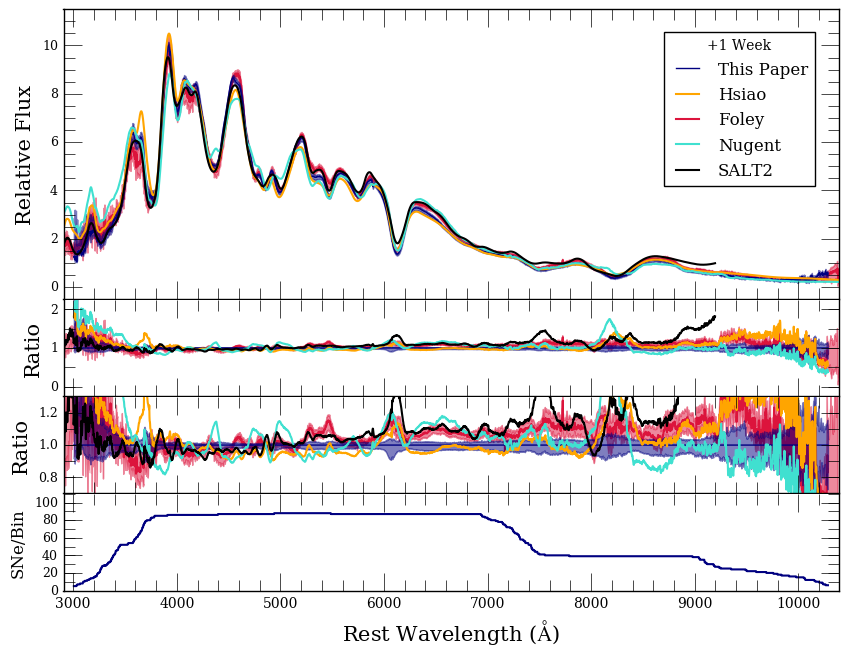

In [99]:
query_db.set_min_num_spec(composites_1week, 5)

comps_and_temps = []
for comp in composites_1week:
    comps_and_temps.append(comp)

srange = np.where((s_template_1week.wavelength > 2000.) & (s_template_1week.wavelength < 9200))[0]
s_template_1week.x1 = srange[0]
s_template_1week.x2 = srange[-1]

comps_and_temps.append(h_template_1week)
comps_and_temps.append(f08_template_p6)
comps_and_temps.append(n_template_1week)
comps_and_temps.append(s_template_1week)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Foley"
comps_and_temps[4].name = "Nugent"
comps_and_temps[5].name = "SALT2"
for comp in comps_and_temps:
    v_strong, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900., 6300.)
    print comp.name, 'v = ', v_strong, si_min_wave
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
                     legend_labels = ["This Paper", "Hsiao", "Foley","Nugent","SALT2"], text='+1 Week', rm_last_label=False, zoom=True,
                     savename = 'template_comparisons_updated/temp_p7_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["This Paper", "Hsiao", "Foley","Nugent","SALT2"], rm_last_label=True, zoom=True, text='+1 Week')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["Composite Spectrum", "Hsiao", "Foley08","Nugent","SALT2"], text='+1 Week', rm_last_label=True, zoom=True,
#                      )
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"])

In [64]:
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["This Paper \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Foley","Nugent","SALT2"],
#                      rm_last_label=True, text='$+$1 Week',
#                      savename = 'template_comparisons_updated/temp_p7_dm15')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["This Paper \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Foley","Nugent","SALT2"],
#                      rm_last_label=True, text='+1 Week',)
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["Composite Spectrum \n($ 1.0 < \Delta m_{15} (B) < 1.2$)", "Hsiao", "Foley08","Nugent","SALT2"],
#                      rm_last_label=True, text='$+$1 Week')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 1.0 < \Delta m_{15} (B) < 1.2$)", "Hsiao", "Nugent","SALT2"])

In [65]:
wave_h_m1week = []
flux_h_m1week = []
for i, phase in enumerate(phase_h):
    if float(phase) == -7.0:
        wave_h_m1week.append(wavelength_hsiao[i])
        flux_h_m1week.append(flux_hsiao[i])

In [66]:
wave_interp_h_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_m1week = inter.splrep(wave_h_m1week, flux_h_m1week)
flux_interp_h_m1week = inter.splev(wave_interp_h_m1week, flux_spl_h_m1week, ext = 3)
h_template_m1week = composite.supernova(wave_interp_h_m1week, flux_interp_h_m1week)
h_template_m1week.phase_array = np.zeros(len(flux_interp_h_m1week))

In [67]:
wave_n_m1week = []
flux_n_m1week = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 13.0:
        wave_n_m1week.append(wavelength_nugent[i])
        flux_n_m1week.append(flux_nugent[i])

In [68]:
wave_interp_n_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_m1week = inter.splrep(wave_n_m1week, flux_n_m1week)
flux_interp_n_m1week = inter.splev(wave_interp_n_m1week, flux_spl_n_m1week, ext = 3)
n_template_m1week = composite.supernova(wave_interp_n_m1week, flux_interp_n_m1week)
n_template_m1week.phase_array = np.zeros(len(flux_interp_n_m1week))

In [69]:
wave_s_m1week = []
flux_s_m1week = []
for i, phase in enumerate(phase_s):
    if float(phase) == -7.0:
        wave_s_m1week.append(wavelength_salt[i])
        flux_s_m1week.append(flux_salt[i])

In [70]:
wave_interp_s_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_m1week = inter.splrep(wave_s_m1week, flux_s_m1week)
flux_interp_s_m1week = inter.splev(wave_interp_s_m1week, flux_spl_s_m1week, ext = 3)
s_template_m1week = composite.supernova(wave_interp_s_m1week, flux_interp_s_m1week)
s_template_m1week.phase_array = np.zeros(len(flux_interp_s_m1week))

In [71]:
query_m1week = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8 and phase < -6 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))",
         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -8 and phase <= -6 and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25))"]

In [72]:
composites_m1week, sn_arrays_m1week, boot_sn_arrays_m1week = query_db.main(len(query_m1week), query_m1week, boot=True, medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8 and phase < -6 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
../data/kaepora_v1.db
145 Total Spectra found
3 flagged spectra removed 142 spectra left
2 spectra of peculiar Ias removed 140 spectra left
119 spectra of SNe with that have host reddening corrections
Arrays cleaned
4 spectra may have telluric contamination
70 total SNe
removed spectra of SNe with A_V > 2.0

Using 110 spectra of 67 SNe
Gini balancing...
Balanced after 16 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -8 and phase <= -6 and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25))
../data/kaepora_v1.db
54 Total Spectra found
2 flagged spectra removed 52 spectra left
0 spectra of peculiar Ias removed 52 spe

In [73]:
query_db.save_comps_to_files(composites_m1week, 'siebert_template_comparison_m1week')

-6.91 1.11 0.011
../data/S19_Composite_Spectra/siebert_template_comparison_m1week_N=67_Nspec=110_phase=m6.91_dm15=1.11_z=0.011.txt
-6.92 1.13 0.01
../data/S19_Composite_Spectra/siebert_template_comparison_m1week_N=23_Nspec=41_phase=m6.92_dm15=1.13_z=0.01.txt


dm15:
1.12046679845
1.13453385177
phase:
-6.90728331239
-6.92348938469
Comp v =  12565.0789473
Comp v =  12565.0789473
Hsiao v =  11682.3277084
Foley v =  12074.3661582
Nugent v =  11486.4857972
SALT2 v =  12663.3101106
Phase:  -6.914894418
dm15:  1.10749535426
Redshift:  0.0113348550422


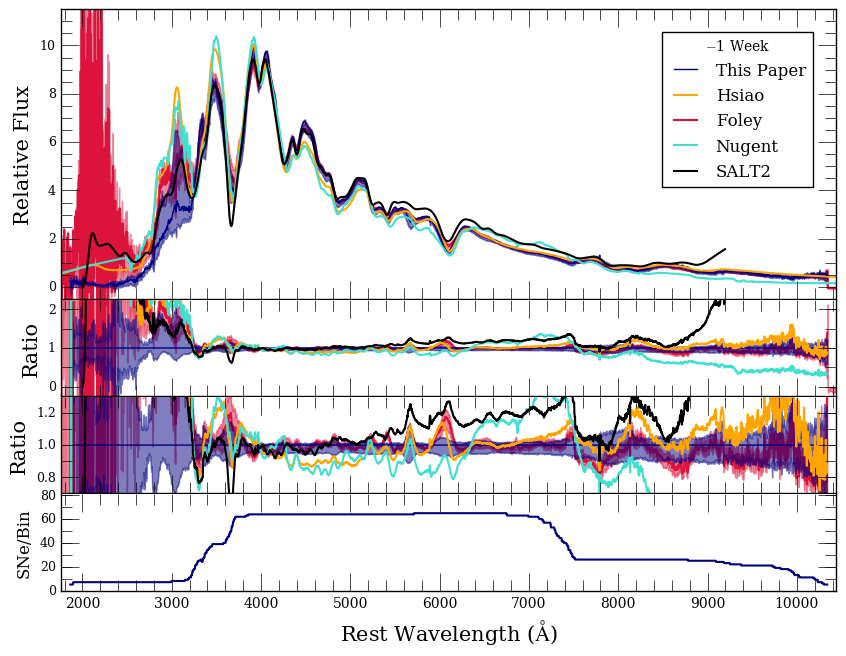

In [100]:
query_db.set_min_num_spec(composites_m1week, 5)
comps_and_temps = []
for comp in composites_m1week:
    comps_and_temps.append(comp)
    
srange = np.where((s_template_m1week.wavelength > 2000.) & (s_template_m1week.wavelength < 9200))[0]
s_template_m1week.x1 = srange[0]
s_template_m1week.x2 = srange[-1]

comps_and_temps.append(h_template_m1week)
comps_and_temps.append(f08_template_m7)
comps_and_temps.append(n_template_m1week)
comps_and_temps.append(s_template_m1week)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print 'dm15:'
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print 'phase:'
print np.average(comps_and_temps[0].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Foley"
comps_and_temps[4].name = "Nugent"
comps_and_temps[5].name = "SALT2"
for comp in comps_and_temps:
    v_strong, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900., 6300.)
    print comp.name, 'v = ', v_strong
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
                     legend_labels = ["This Paper", "Hsiao", "Foley", "Nugent","SALT2"], 
                     rm_last_label=False, text='$-$1 Week',
                     savename = 'template_comparisons_updated/temp_m7_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["This Paper", "Hsiao", "Foley", "Nugent","SALT2"], text='$-$1 Week',
#                      rm_last_label=True)
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"])

In [75]:
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["Composite Spectrum \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Foley+08","Nugent","SALT2"], 
#                      rm_last_label=True, text='$-$1 Week',
#                      savename = 'template_comparisons_updated/temp_m7_dm15')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["This Paper \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Foley","Nugent","SALT2"], 
#                      rm_last_label=True, text='$-$1 Week',)
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 0.98 < \Delta m_{15} (B) < 1.18$)", "Hsiao", "Nugent","SALT2"])

In [76]:
wave_h_1month = []
flux_h_1month = []
for i, phase in enumerate(phase_h):
    if float(phase) == 30.0:
        wave_h_1month.append(wavelength_hsiao[i])
        flux_h_1month.append(flux_hsiao[i])

In [77]:
wave_interp_h_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_1month = inter.splrep(wave_h_1month, flux_h_1month)
flux_interp_h_1month = inter.splev(wave_interp_h_1month, flux_spl_h_1month, ext = 3)
h_template_1month = composite.supernova(wave_interp_h_1month, flux_interp_h_1month)
h_template_1month.phase_array = np.zeros(len(flux_interp_h_1month))

In [78]:
wave_n_1month = []
flux_n_1month = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 50.0:
        wave_n_1month.append(wavelength_nugent[i])
        flux_n_1month.append(flux_nugent[i])

In [79]:
wave_interp_n_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_1month = inter.splrep(wave_n_1month, flux_n_1month)
flux_interp_n_1month = inter.splev(wave_interp_n_1month, flux_spl_n_1month, ext = 3)
n_template_1month = composite.supernova(wave_interp_n_1month, flux_interp_n_1month)
n_template_1month.phase_array = np.zeros(len(flux_interp_n_1month))

In [80]:
wave_s_1month = []
flux_s_1month = []
for i, phase in enumerate(phase_s):
    if float(phase) == 30.0:
        wave_s_1month.append(wavelength_salt[i])
        flux_s_1month.append(flux_salt[i])

In [81]:
wave_interp_s_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_1month = inter.splrep(wave_s_1month, flux_s_1month)
flux_interp_s_1month = inter.splev(wave_interp_s_1month, flux_spl_s_1month, ext = 3)
s_template_1month = composite.supernova(wave_interp_s_1month, flux_interp_s_1month)
s_template_1month.phase_array = np.zeros(len(flux_interp_s_1month))

In [82]:
query_1month = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 28 and phase < 32 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))",
         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 28 and phase <= 32 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))"]

In [83]:
composites_1month, sn_arrays_1month, boot_sn_arrays_tmonth = query_db.main(len(query_1month), query_1month, boot=True, medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 28 and phase < 32 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
../data/kaepora_v1.db
139 Total Spectra found
3 flagged spectra removed 136 spectra left
3 spectra of peculiar Ias removed 133 spectra left
125 spectra of SNe with that have host reddening corrections
Arrays cleaned
4 spectra may have telluric contamination
88 total SNe
removed spectra of SNe with A_V > 2.0

Using 117 spectra of 86 SNe
Gini balancing...
Balanced after 25 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 28 and phase <= 32 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
../data/kaepora_v1.db
63 Total Spectra found
1 flagged spectra removed 62 spectra left
0 spectra of peculiar Ias removed 62 spectra

In [84]:
query_db.save_comps_to_files(composites_1month, 'siebert_template_comparison_p1month')

29.69 1.14 0.015
../data/S19_Composite_Spectra/siebert_template_comparison_p1month_N=86_Nspec=117_phase=p29.69_dm15=1.14_z=0.015.txt
29.88 1.09 0.013
../data/S19_Composite_Spectra/siebert_template_comparison_p1month_N=37_Nspec=52_phase=p29.88_dm15=1.09_z=0.013.txt


dm15:
1.13756615491
1.08720242084
phase:
29.6957167492
29.8845968482
Phase:  29.6941963851
dm15:  1.13614941442
Redshift:  0.0146395698142


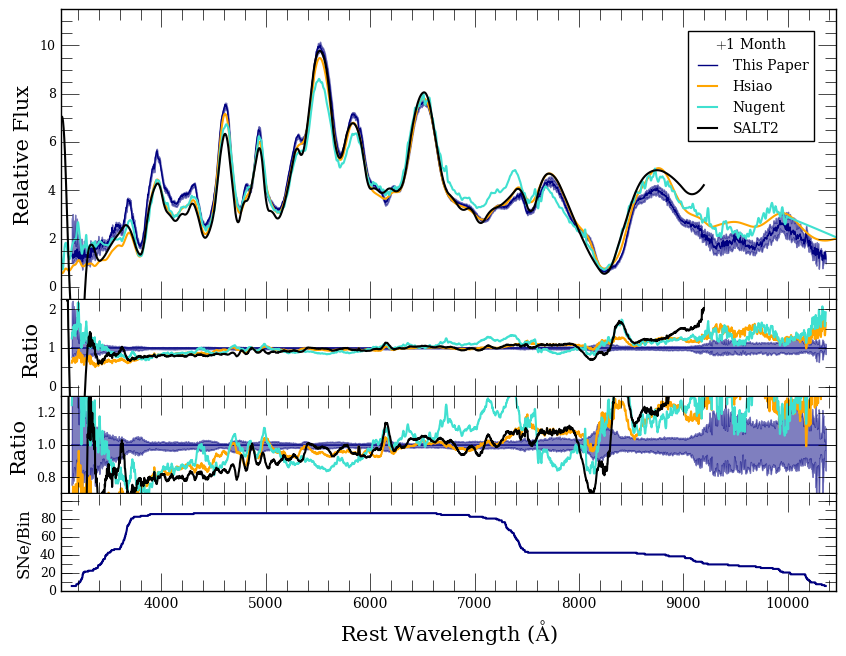

In [101]:
query_db.set_min_num_spec(composites_1month, 5)
comps_and_temps = []
for comp in composites_1month:
    comps_and_temps.append(comp)

srange = np.where((s_template_1month.wavelength > 2000.) & (s_template_1month.wavelength < 9200))[0]
s_template_1month.x1 = srange[0]
s_template_1month.x2 = srange[-1]

comps_and_temps.append(h_template_1month)
comps_and_temps.append(n_template_1month)
comps_and_temps.append(s_template_1month)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print 'dm15:'
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print 'phase:'
print np.average(comps_and_temps[0].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Nugent"
comps_and_temps[4].name = "SALT2"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
                     legend_labels = ["This Paper", "Hsiao", "Nugent","SALT2"], text='$+$1 Month',
                     rm_last_label=True,
                     savename = 'template_comparisons_updated/temp_p30_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
#                      legend_labels = ["This Paper", "Hsiao", "Nugent","SALT2"], text='$+$1 Month',
#                      rm_last_label=True)
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"])

Phase:  29.8845968482
dm15:  1.08720242084
Redshift:  0.0126378363248


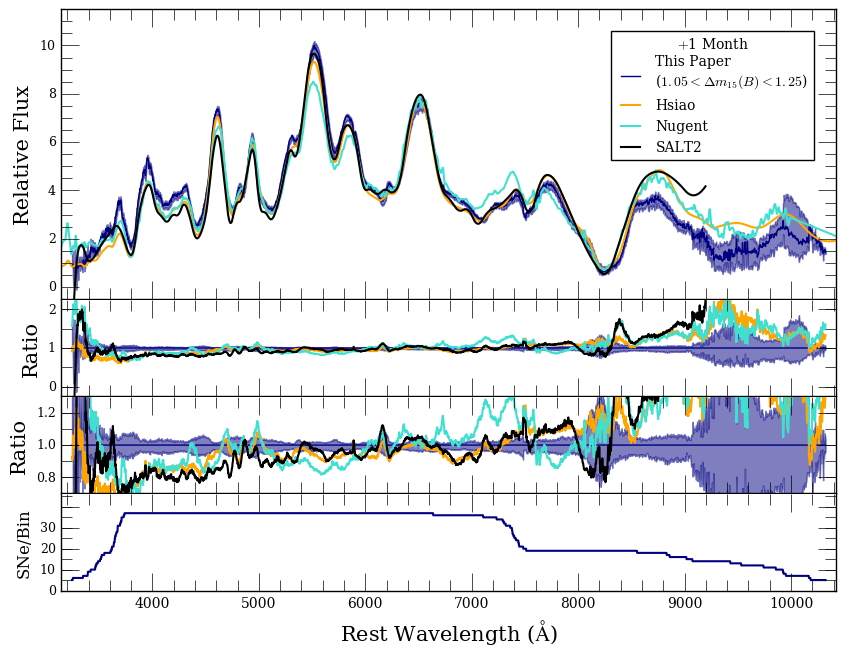

In [86]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
                     legend_labels = ["This Paper \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Nugent","SALT2"], 
                     rm_last_label=True, text='$+$1 Month',
                     savename = 'template_comparisons_updated/temp_p30_dm15')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
#                      legend_labels = ["This Paper \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Nugent","SALT2"], 
#                      rm_last_label=True, text='$+$1 Month',)
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 0.95 < \Delta m_{15} (B) < 1.15$)", "Hsiao", "Nugent","SALT2"])

## 91t and 91bg nugent maximum light comparisons

In [87]:
# query_91t = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source <= .9) or (dm15_from_fits <= .9)) and Supernovae.SN !='2002bf'"]

In [88]:
# composites_91t, sn_arrays_91t, boot_sn_arrays_91t = query_db.main(len(query_91t), query_91t, boot='b', medmean=1, verbose=False)

In [89]:
# query_db.set_min_num_spec(composites_91t, 5)

In [90]:
# comps_and_temps = []
# for comp in composites_91t:
#     comps_and_temps.append(comp)
# comps_and_temps.append(n_template_91t)
# comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[1], True)

# print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
# comps_and_temps[0].name = "Comp"
# comps_and_temps[1].name = "Nugent"
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], legend_labels = ["Composite Spectrum \n($ 0.75 < \Delta m_{15} (B) < 0.90$)", "Nugent-91T"])

In [91]:
query_91bg = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.8) or (dm15_from_fits >= 1.8))"]

In [92]:
composites_91bg, sn_arrays_91bg, boot_sn_arrays_91bg = query_db.main(len(query_91bg), query_91bg, boot=True, medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.8) or (dm15_from_fits >= 1.8))
../data/kaepora_v1.db
36 Total Spectra found
1 flagged spectra removed 35 spectra left
1 spectra of peculiar Ias removed 34 spectra left
28 spectra of SNe with that have host reddening corrections
Arrays cleaned
2 spectra may have telluric contamination
11 total SNe
removed spectra of SNe with A_V > 2.0

Using 28 spectra of 11 SNe
Gini balancing...
Balanced after 6 iterations
Bootstrapping
scaling boots...
computing confidence intervals...


In [93]:
query_db.save_comps_to_files(composites_91bg, 'siebert_template_comparison_large_dm15')

-0.04 1.89 0.008
../data/S19_Composite_Spectra/siebert_template_comparison_large_dm15_N=11_Nspec=28_phase=m0.04_dm15=1.89_z=0.008.txt


1.88610155112
Phase:  -0.0416822672463
dm15:  1.88610155112
Redshift:  0.00832070692501


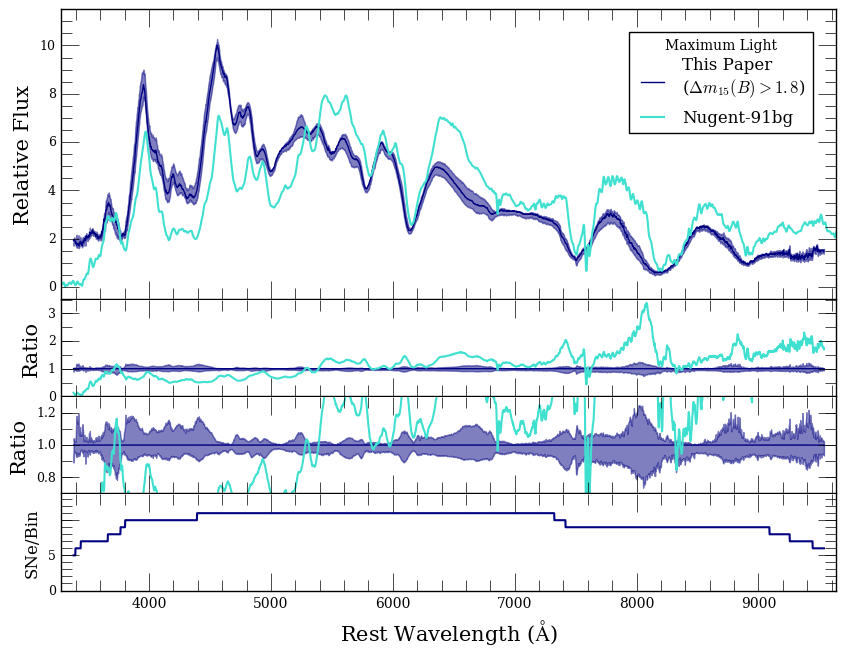

In [102]:
query_db.set_min_num_spec(composites_91bg, 5)
comps_and_temps = []
for comp in composites_91bg:
    comps_and_temps.append(comp)
comps_and_temps.append(n_template_91bg)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[1], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Nugent"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], include_spec_bin=True, 
                     legend_labels = ["This Paper \n($\Delta m_{15} (B) > 1.8$)", "Nugent-91bg"], 
                     rm_last_label=True, expand_ratio=True, text='Maximum Light',
                     savename = 'template_comparisons_updated/temp_max_light_91bg')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], include_spec_bin=True, 
#                      legend_labels = ["This Paper \n($\Delta m_{15} (B) > 1.8$)", "Nugent-91bg"], 
#                      rm_last_label=True, expand_ratio=True, text='Maximum Light')